<a href="https://colab.research.google.com/github/AzadMehedi/ML-Projects/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
df.sample(6)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
333,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
520,59,1,0,140,177,0,1,162,1,0.0,2,1,3,0
283,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
837,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
689,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
697,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0


In [6]:
df.shape

(1025, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

[]

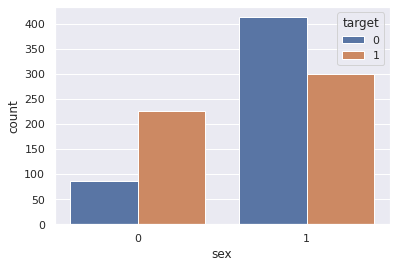

In [9]:
# ploting
sns.countplot(data=df, x='sex', hue='target')
plt.plot()

<AxesSubplot:xlabel='age', ylabel='Count'>

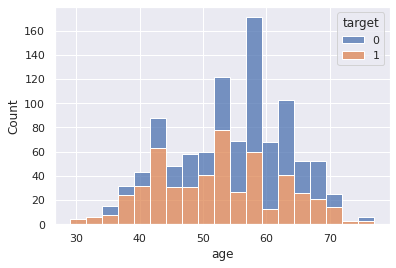

In [10]:
sns.histplot(data=df, x='age', hue='target',multiple='stack')

<AxesSubplot:xlabel='chol', ylabel='Count'>

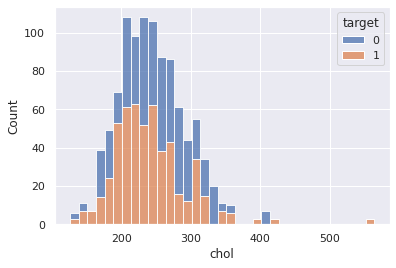

In [11]:
sns.histplot(data=df, x='chol', hue='target', multiple='stack')

<AxesSubplot:xlabel='trestbps', ylabel='Count'>

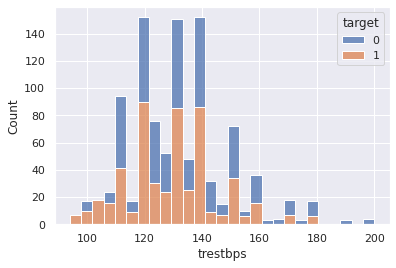

In [12]:
sns.histplot(data=df, x='trestbps', hue='target', multiple='stack')

<AxesSubplot:xlabel='thalach', ylabel='Count'>

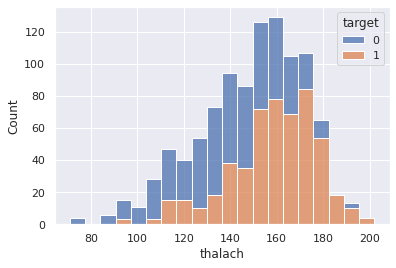

In [13]:
sns.histplot(data=df, x='thalach', hue='target', multiple='stack')

# Data Preproccessing

1    526
0    499
Name: target, dtype: int64


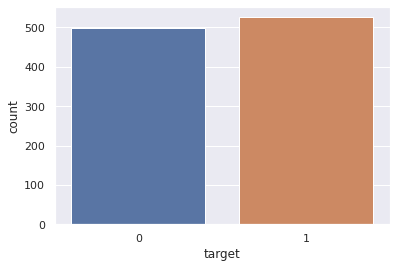

In [14]:
sns.countplot(df['target'])
print(df.target.value_counts())

In [15]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [17]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Outlier Detection

<AxesSubplot:xlabel='age'>

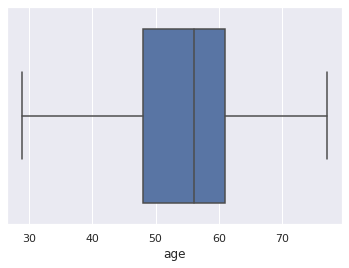

In [18]:
sns.boxplot(df['age'])

<AxesSubplot:xlabel='trestbps'>

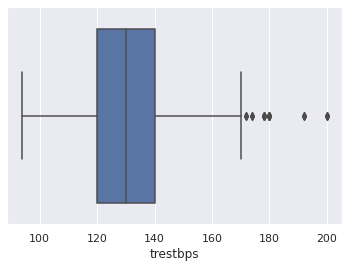

In [19]:
sns.boxplot(df['trestbps'])

<AxesSubplot:xlabel='chol'>

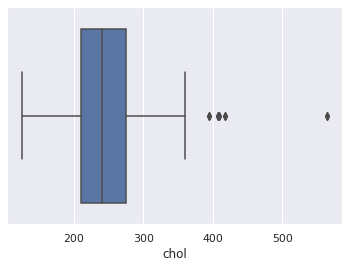

In [20]:
sns.boxplot(df['chol'])

<AxesSubplot:xlabel='oldpeak'>

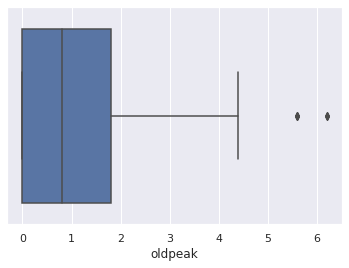

In [21]:
sns.boxplot(df['oldpeak'])

# Removing Outlier using Z-Score

In [22]:
from scipy import stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis=1)]
data_clean.shape

(969, 14)

# Data Correlation using Heatmap

<AxesSubplot:>

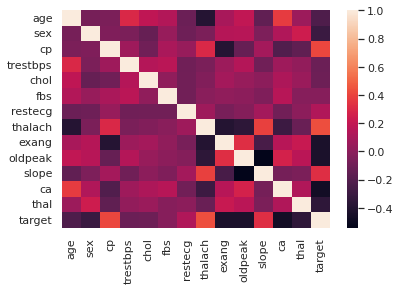

In [23]:
sns.heatmap(data_clean.corr(), fmt='0.2g')

# Correlation between Class and other attributes

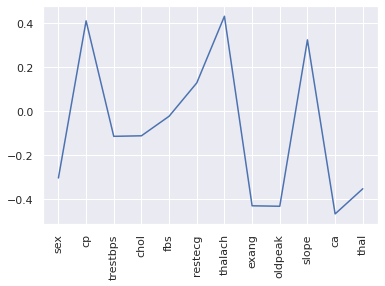

In [24]:
corr = data_clean[data_clean.columns[1:]].corr()['target'][:-1]
plt.plot(corr)
plt.xticks(rotation=90)
plt.show()

# Machine Learning Model Building

In [25]:
X = data_clean.drop('target', axis=1) # training data
y = data_clean['target']  # testing data

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
y_pred = dtree.predict(X_test)
print('Accuracy Score: ', round(accuracy_score(y_test,y_pred)*100,2), '%')

Accuracy Score:  100.0 %


In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F1 Score: ',(f1_score(y_test,y_pred)))
print('Precision Score: ',(precision_score(y_test,y_pred)))
print('Recal score: ',(recall_score(y_test,y_pred)))

F1 Score:  1.0
Precision Score:  1.0
Recal score:  1.0


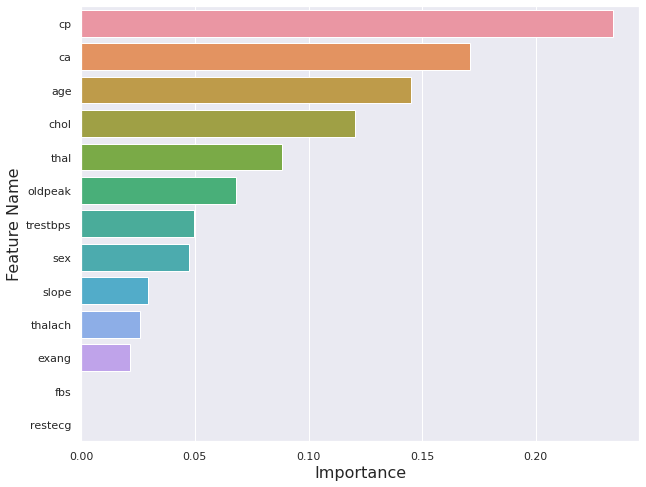

In [30]:
# Feature Importance

imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance': dtree.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

# Random Forest


In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [32]:
y_pred = rfc.predict(X_test)
print('Acuracy Score: ', round(accuracy_score(y_test, y_pred)*100, 2), '%')

Acuracy Score:  100.0 %


In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 Score: ',(f1_score(y_test,y_pred)))
print('Precision Score: ', (precision_score(y_test,y_pred)))
print('Recall Score: ',(recall_score(y_test,y_pred)))

F-1 Score:  1.0
Precision Score:  1.0
Recall Score:  1.0


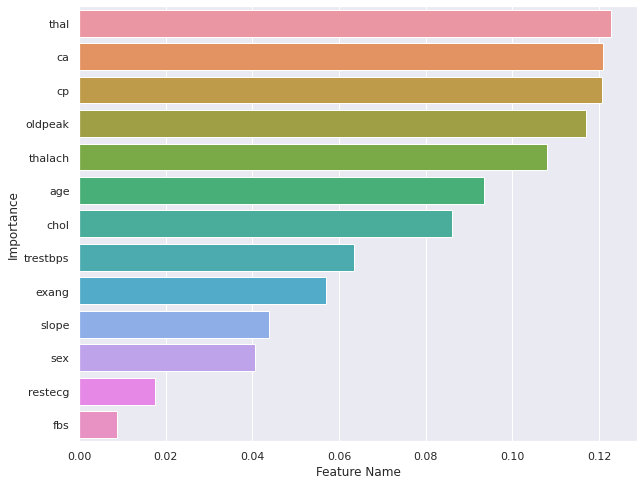

In [39]:
# Feature Importance
imp_df = pd.DataFrame({
    'Feature Name':X_train.columns,
    'Importance': rfc.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance', y='Feature Name')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.show()


# AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=0)

In [44]:
y_pred = ada.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.3 %


In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('F-1 score: ',(f1_score(y_test,y_pred)))
print('Precision Score: ',(precision_score(y_test,y_pred)))
print('Recall Score: ', (recall_score(y_test,y_pred)))

F-1 score:  0.9365853658536586
Precision Score:  0.9411764705882353
Recall Score:  0.9320388349514563


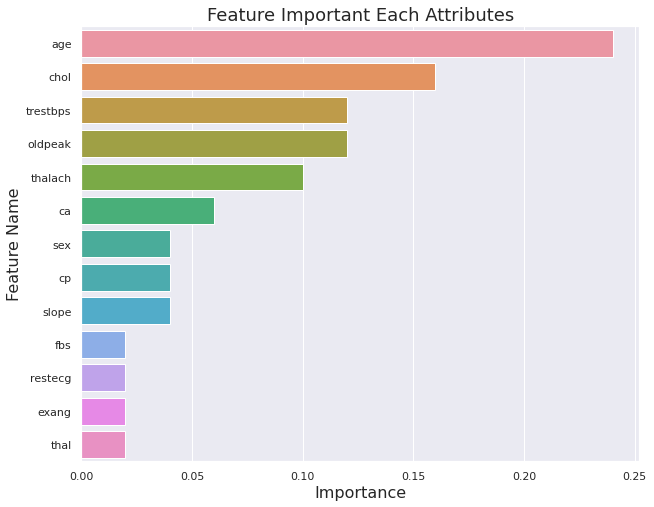

In [50]:
# Feature Importance
imp_df = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance':ada.feature_importances_
})
fi = imp_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,8))
sns.barplot(data=fi, x='Importance',y='Feature Name')
plt.title('Feature Important Each Attributes', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()